**Importing the Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/Indian_Domestic_Airline.csv'

# Import the data using pandas
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

In [ ]:
# Data Overview
print(df.head())
print(df.info())
df.describe()

    AirLine_Name  Rating - 10                          Title  \
0  AirAsia India          6.0          "crew were welcoming"   
1  AirAsia India          1.0     "furious and disappointed"   
2  AirAsia India         10.0  "amazing service and support"   
3  AirAsia India          1.0      "Waste of time and money"   
4  AirAsia India          8.0   "thumbs up to boarding crew"   

                     Name               Date  \
0                V Bakshi  14th October 2023   
1                 G Oscar  14th October 2023   
2             Rahul Verma  14th October 2023   
3                 G Akron  14th October 2023   
4  Sirajudeen Jawahar ali  14th October 2023   

                                              Review Recommond  
0  ✅ Trip Verified | I had booked this fare at a ...       yes  
1  ✅ Trip Verified | I travel at least four times...        no  
2  ✅ Trip Verified | Taking this opportunity to a...       yes  
3  ✅ Trip Verified | The worst airlines in the hi...        no  
4

,Rating - 10
count,2206.000000
mean,4.033092
std,3.582053
min,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,10.000000


In [ ]:
# Create a new index column
df['Index'] = range(1, len(df) + 1)
df = df.set_index('Index')
df.head()

,AirLine_Name,Rating - 10,Title,Name,Date,Review,Recommond
Index,,,,,,,
1,AirAsia India,6.0,"""crew were welcoming""",V Bakshi,14th October 2023,✅ Trip Verified | I had booked this fare at a ...,yes
2,AirAsia India,1.0,"""furious and disappointed""",G Oscar,14th October 2023,✅ Trip Verified | I travel at least four times...,no
3,AirAsia India,10.0,"""amazing service and support""",Rahul Verma,14th October 2023,✅ Trip Verified | Taking this opportunity to a...,yes
4,AirAsia India,1.0,"""Waste of time and money""",G Akron,14th October 2023,✅ Trip Verified | The worst airlines in the hi...,no
5,AirAsia India,8.0,"""thumbs up to boarding crew""",Sirajudeen Jawahar ali,14th October 2023,✅ Trip Verified | Would like to give big thum...,yes


In [ ]:
# Create a new column 'Trip Verified' based on the 'Review' column
df['Trip Verified'] = np.where(df['Review'].str.startswith('✅ Trip Verified |'), 'Yes', 'No')

# Display the updated DataFrame
print(df.head())

        AirLine_Name  Rating - 10                          Title  \
Index                                                              
1      AirAsia India          6.0          "crew were welcoming"   
2      AirAsia India          1.0     "furious and disappointed"   
3      AirAsia India         10.0  "amazing service and support"   
4      AirAsia India          1.0      "Waste of time and money"   
5      AirAsia India          8.0   "thumbs up to boarding crew"   

                         Name               Date  \
Index                                              
1                    V Bakshi  14th October 2023   
2                     G Oscar  14th October 2023   
3                 Rahul Verma  14th October 2023   
4                     G Akron  14th October 2023   
5      Sirajudeen Jawahar ali  14th October 2023   

                                                  Review Recommond  \
Index                                                                
1      ✅ Trip Veri

In [ ]:
#Replace "✅ Trip Verified |"
df['Review'] = df['Review'].str.replace('✅ Trip Verified |', '', regex=False)

#Replace "Not Verified |"
df['Review'] = df['Review'].str.replace('Not Verified |', '', regex=False)

#Remove leading and trailing whitespace from the 'Review' column
df['Review'] = df['Review'].str.strip()

print(df.head())

        AirLine_Name  Rating - 10                          Title  \
Index                                                              
1      AirAsia India          6.0          "crew were welcoming"   
2      AirAsia India          1.0     "furious and disappointed"   
3      AirAsia India         10.0  "amazing service and support"   
4      AirAsia India          1.0      "Waste of time and money"   
5      AirAsia India          8.0   "thumbs up to boarding crew"   

                         Name               Date  \
Index                                              
1                    V Bakshi  14th October 2023   
2                     G Oscar  14th October 2023   
3                 Rahul Verma  14th October 2023   
4                     G Akron  14th October 2023   
5      Sirajudeen Jawahar ali  14th October 2023   

                                                  Review Recommond  \
Index                                                                
1      I had booke

In [ ]:
#Check for missing values

df.isnull().sum()


,0
AirLine_Name,0
Rating - 10,4
Title,0
Name,0
Date,0
Review,0
Recommond,0
Trip Verified,0


In [ ]:
# Removing missing and duplicate values.

# Remove rows with missing values in the 'Rating' column
df.dropna(subset=['Rating - 10'], inplace=True)

# Check for duplicates in 'Name' and 'Review' columns
duplicate_rows = df[df.duplicated(subset=['Name', 'Review'], keep=False)]

# Remove duplicate rows based on 'Name' and 'Review'
df.drop_duplicates(subset=['Name', 'Review'], keep='first', inplace=True)

# Print the number of duplicate rows removed
print(f"Number of duplicate rows removed: {len(duplicate_rows)}")


Number of duplicate rows removed: 2


In [ ]:
df.rename(columns={'Rating - 10': 'Rating'}, inplace=True)
df.rename(columns={'Recommond': 'Recommend'}, inplace=True)

In [ ]:
# Convert 'date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # 'coerce' will handle invalid dates

# Convert 'recommend' column to binary values (1 for 'yes', 0 for 'no')
df['Recommend'] = df['Recommend'].map({'yes': 1, 'no': 0})

# Convert 'Trip Verified' column to binary values (1 for 'Yes', 0 for 'No')
df['Trip Verified'] = df['Trip Verified'].map({'Yes': 1, 'No': 0})

# Display updated DataFrame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 1 to 2210
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AirLine_Name   2205 non-null   object        
 1   Rating         2205 non-null   float64       
 2   Title          2205 non-null   object        
 3   Name           2205 non-null   object        
 4   Date           1817 non-null   datetime64[ns]
 5   Review         2205 non-null   object        
 6   Recommend      2205 non-null   int64         
 7   Trip Verified  2205 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 155.0+ KB
None


In [ ]:
# Sort the DataFrame by the 'Date' column
df.sort_values('Date', inplace=True)

# Forward fill missing values in the 'Date' column
df['Date'].fillna(method='ffill', inplace=True)

print(df.info())  # Display the updated DataFrame

# Reset the index after sorting
df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame with the reset index
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 1441 to 2190
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AirLine_Name   2205 non-null   object        
 1   Rating         2205 non-null   float64       
 2   Title          2205 non-null   object        
 3   Name           2205 non-null   object        
 4   Date           2205 non-null   datetime64[ns]
 5   Review         2205 non-null   object        
 6   Recommend      2205 non-null   int64         
 7   Trip Verified  2205 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 155.0+ KB
None
  AirLine_Name  Rating                   Title           Name       Date  \
0       IndiGo     9.0  IndiGo customer review      W Montego 2013-01-08   
1       IndiGo     7.0  IndiGo customer review    Saketh Rahm 2013-01-08   
2       IndiGo     8.0  IndiGo customer review   Kumar Ganesh 2013-01-

<ipython-input-23-6f0c65be894e>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'].fillna(method='ffill', inplace=True)


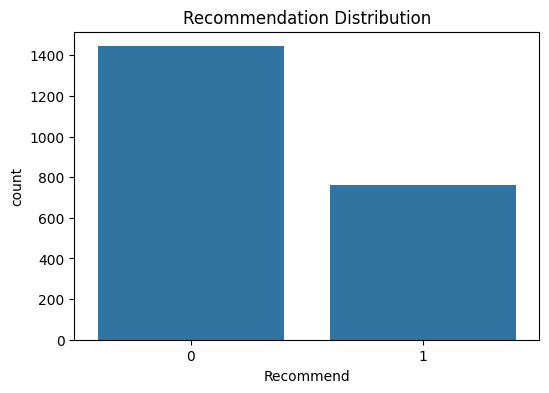

In [ ]:
#Distribution of Recommendation
plt.figure(figsize=(6,4))
sns.countplot(x='Recommend', data=df)
plt.title('Recommendation Distribution')
plt.show()


In [ ]:
# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

print(df.head())

  AirLine_Name  Rating                   Title           Name       Date  \
0       IndiGo     9.0  IndiGo customer review      W Montego 2013-01-08   
1       IndiGo     7.0  IndiGo customer review    Saketh Rahm 2013-01-08   
2       IndiGo     8.0  IndiGo customer review   Kumar Ganesh 2013-01-08   
3       IndiGo     9.0  IndiGo customer review  Rishad Patell 2013-01-08   
4       IndiGo     9.0  IndiGo customer review   Ameya Chitre 2013-01-08   

                                              Review  Recommend  \
0  Flew MAA-PNQ (Chennai-Pune). Excellent crew an...          1   
1  Overall a good experience from HYD-BLR-HYD and...          1   
2  DEL-COK-DEL. Excellent flight both flights on ...          1   
3  Ahmedabad to Pune on Indigo. Check in was easy...          1   
4  BOM-BDQ on A320. Check-in was not as efficient...          1   

   Trip Verified  Year  Month  
0              0  2013      1  
1              0  2013      1  
2              0  2013      1  
3           

In [ ]:
#Find average rating
average_rating = df['Rating'].mean()
print(f"The average rating is: {average_rating}")

The average rating is: 4.031292517006802


In [ ]:
df.describe()

,Rating,Date,Recommend,Trip Verified,Year,Month,Sentiment,Cluster
count,2205.000000,2205,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,4.031293,2022-03-03 22:54:41.632653056,0.345125,0.671202,2021.624943,6.993197,0.047553,1.195918
min,1.000000,2013-01-08 00:00:00,0.000000,0.000000,2013.000000,1.000000,-1.000000,0.000000
25%,1.000000,2020-03-30 00:00:00,0.000000,0.000000,2020.000000,4.000000,-0.128249,1.000000
50%,2.000000,2022-12-08 00:00:00,0.000000,1.000000,2022.000000,8.000000,0.030980,1.000000
75%,8.000000,2024-03-16 00:00:00,1.000000,1.000000,2024.000000,9.000000,0.227588,2.000000
max,10.000000,2024-09-26 00:00:00,1.000000,1.000000,2024.000000,12.000000,0.955000,2.000000
std,3.581869,NaN,0.475517,0.469883,2.495807,3.289626,0.281520,0.792250


## Feature Engineering

**Sentiment Analysis**

In [ ]:
# Install TextBlob
!pip install textblob
from textblob import TextBlob


In [ ]:
#Define a function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

#Apply the function to the 'Review' column
df['Sentiment'] = df['Review'].apply(get_sentiment)

Categorize Sentiment

In [ ]:
#Define a function to categorize the sentiment

def sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment_Category'] = df['Sentiment'].apply(sentiment_category)


## Data Preprocessing

**Text Preprocessing**

In [ ]:
#Import necessary modules:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [ ]:
#Define a function to preprocess the text:

def preprocess_text(text):
    # Tokenize
    words = word_tokenize(text.lower())
    # Remove stop words and non-alphabetic characters
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)


In [ ]:
df['Clean_Review'] = df['Review'].apply(preprocess_text)

In [ ]:
df.head()

,AirLine_Name,Rating,Title,Name,Date,Review,Recommend,Trip Verified,Year,Month,Sentiment,Sentiment_Category,Clean_Review
0,IndiGo,9.0,IndiGo customer review,W Montego,2013-01-08,Flew MAA-PNQ (Chennai-Pune). Excellent crew an...,1,0,2013,1,0.200000,Positive,flew excellent crew food service seat terrible...
1,IndiGo,7.0,IndiGo customer review,Saketh Rahm,2013-01-08,Overall a good experience from HYD-BLR-HYD and...,1,0,2013,1,0.144620,Positive,overall good experience plane new modern crew ...
2,IndiGo,8.0,IndiGo customer review,Kumar Ganesh,2013-01-08,DEL-COK-DEL. Excellent flight both flights on ...,1,0,2013,1,0.290000,Positive,excellent flight flight time meal seat breeze ...
3,IndiGo,9.0,IndiGo customer review,Rishad Patell,2013-01-08,Ahmedabad to Pune on Indigo. Check in was easy...,1,0,2013,1,0.437500,Positive,ahmedabad pune indigo check easy fast efficien...
4,IndiGo,9.0,IndiGo customer review,Ameya Chitre,2013-01-08,BOM-BDQ on A320. Check-in was not as efficient...,1,0,2013,1,0.041667,Positive,efficient know indigo problem kept waiting due...


## Applying Machine Learning Models

**Customer Segmentation Using Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['Rating', 'Sentiment']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


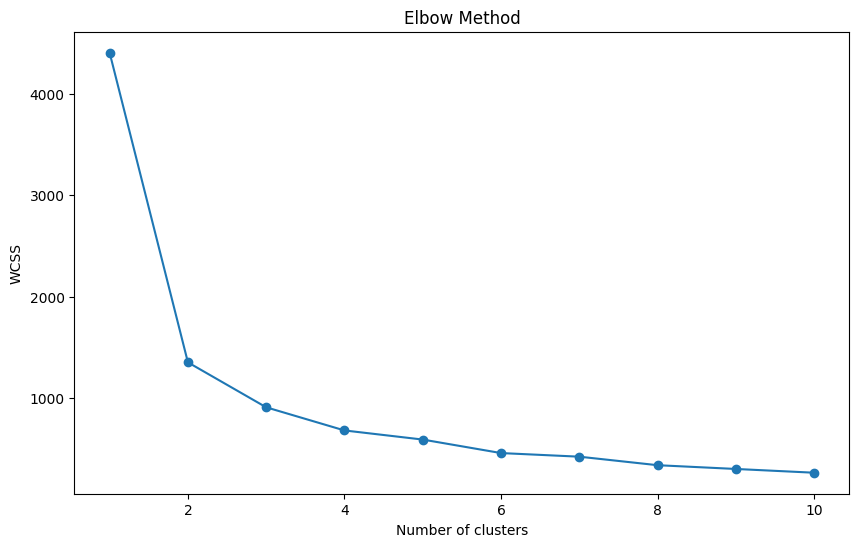

In [ ]:
# Plot the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Apply KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


**Predicting Customer Loyalty**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Text features
vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df['Clean_Review'])

# Other numerical features
X_numerical = df[['Rating', 'Sentiment', 'Trip Verified']].reset_index(drop=True)

# Combine text and numerical features
from scipy.sparse import hstack

X = hstack([X_text, X_numerical])

# Labels
y = df['Recommend']


In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       284
           1       0.96      0.96      0.96       157

    accuracy                           0.97       441
   macro avg       0.97      0.97      0.97       441
weighted avg       0.97      0.97      0.97       441

Accuracy: 0.9682539682539683


## Visualization

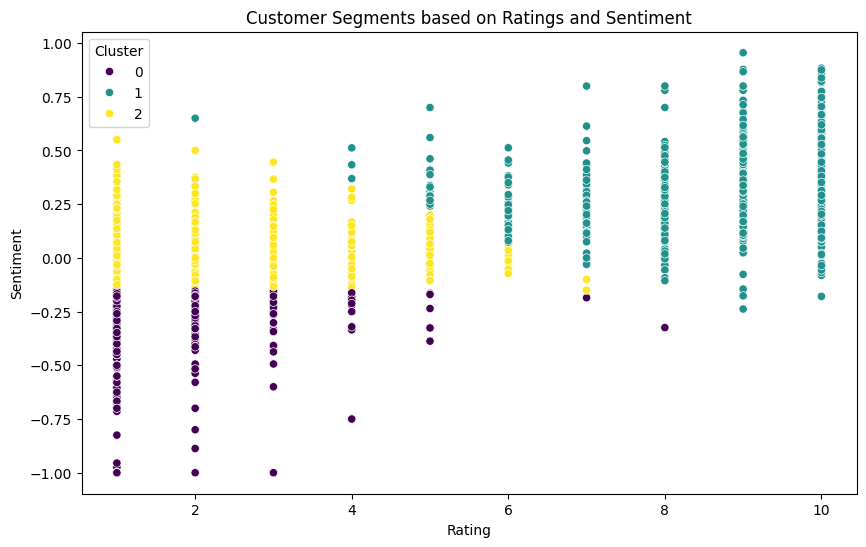

In [ ]:
# Cluster Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Rating'], y=df['Sentiment'], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments based on Ratings and Sentiment')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.show()


In [ ]:
# Group by 'Sentiment_Category' and calculate the count and percentage 'Sentiment'
sentiment_analysis = df.groupby('Sentiment_Category')['Sentiment'].agg(['count'])

# Calculate percentage
sentiment_analysis['percentage'] = (sentiment_analysis['count'] / sentiment_analysis['count'].sum()) * 100

# Print the results
print(sentiment_analysis)

                    count  percentage
Sentiment_Category                   
Negative              977   44.308390
Neutral                38    1.723356
Positive             1190   53.968254


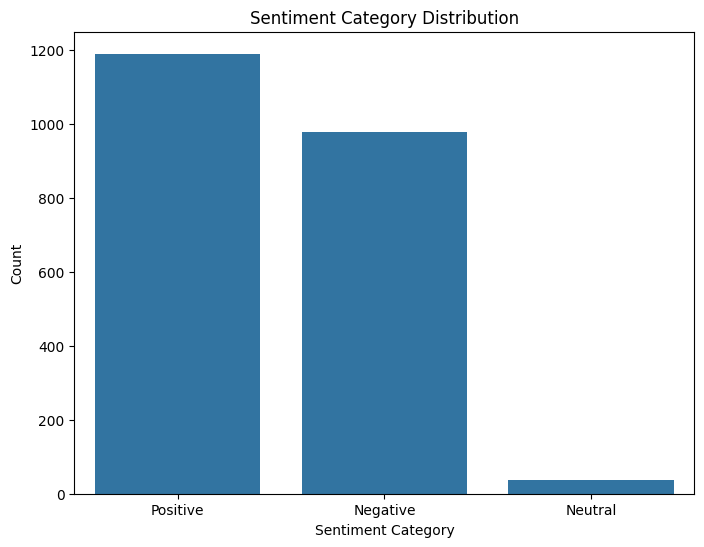

In [ ]:
#Sentiment Distribution

plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment_Category', data=df)
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()
